In [1]:
!jupyter nbextension enable --py widgetsnbextension
import random as rd
import torch
from PIL import Image
from tqdm import tqdm
import numpy as np
from datasets import load_dataset,load_metric,DatasetDict,concatenate_datasets,config
from datasets import Image as DImage
from transformers import ViTFeatureExtractor, ViTModel, ViTForImageClassification, TrainingArguments, Trainer, integrations

device = "cuda" if torch.cuda.is_available() else "cpu"

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [ ]:
ds = load_dataset("imagefolder",data_dir='./NData')
labels = ds['train'].features['label'].names

In [3]:
display(labels)
# def same_label(example,lbl):
#     ls = []
#     # display(example)
#     for val in example['label']:
#         ls.append(val==lbl)
#     return ls

['bacterial_spot',
 'black_rot',
 'black_spot',
 'blight',
 'brown_spot_fungi',
 'brown_streak',
 'canker',
 'fungi_spot',
 'gray_spot',
 'green_mottle',
 'greening',
 'healthy',
 'hispa',
 'isariopis_spot',
 'leaf_blast',
 'measeles',
 'mold',
 'mosaic',
 'powdery_mildew',
 'rust',
 'scab',
 'scorch',
 'spider_mites',
 'target_spot',
 'yellow_curl']

In [4]:
# ds_list = DatasetDict()
# for label in (range(len(labels))):
#     ds_list[labels[label]]=ds.filter(same_label, batched=True,batch_size=10000,fn_kwargs={'lbl':label},num_proc =8)['train']
# ds_list

In [5]:
ds_tr = ds['train'].train_test_split(test_size=0.02011758729775538019725294345449)
ds_ts = ds_tr['test'].train_test_split(test_size=0.5)
ods = ds
ds = DatasetDict({
    'train': ds['train'],
    'test': ds_ts['test'],
    'valid': ds_ts['train']})
ds


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 994155
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
    valid: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [6]:
# import torchvision.transforms as ttr
# # from math import floor

# map_fun = ttr.Compose(
#     [ttr.RandomHorizontalFlip(),ttr.RandomRotation(180,fill=255),ttr.GaussianBlur(9,sigma=(0.01,2.0))]
# )

# def map_red_fun(exp_batch,times=1,mp_fn=map_fun):# batch: Dict[str, List]) -> Dict[str, List]
#     itms = int(times)
#     ltms = int((times-int(times))*len(exp_batch['label']))
#     print("times:",itms,ltms)#,times,times-floor(times),len(exp_batch['label']))
    
    
#     if(times<1):
#         # return {
#         # 'image': exp_batch['image'][:ltms]
#         # 'label': exp_batch['label'][:ltms]
#         # }
#         return exp_batch[:ltms]
#     elif(times==1):
#         return exp_batch
#     else:
#         images = list(exp_batch['image'])
#         lbls = exp_batch['label']
#         if itms>1:    
#             for i in range(itms-1):
#                 images += [mp_fn(img).convert('RGB') for img in exp_batch['image']]
#             lbls += exp_batch['label']*(itms-1)
#         if(ltms>0):
#             images += [mp_fn(img).convert('RGB') for img in exp_batch['image'][:ltms]]
#             lbls += exp_batch['label'][:ltms]
    
#         return {
#             'image':images,
#             'label':lbls
#         }
        

# ds_list[labels[2][:2]].map(map_red_fun,batched=True,batch_size=40,num_proc=8,fn_kwargs=2)
# ds_list[labels[2]].select(range(10)).map(map_red_fun,batched=True,fn_kwargs={'times':4.7})
# map_red_fun(ds_list[labels[2]][:3],4.7)

In [7]:
# def save_fun(zhelabel,)
# def map_save_fun(exp_batch,idxs,zhelabel,mp_fn=save_fun):# batch: Dict[str, List]) -> Dict[str, List]
#     itms = int(times)
#     ltms = int((times-int(times))*len(exp_batch['label']))
#     print("times:",itms,ltms)#,times,times-floor(times),len(exp_batch['label']))
    
    
#     if(times<1):
#         # return {
#         # 'image': exp_batch['image'][:ltms]
#         # 'label': exp_batch['label'][:ltms]
#         # }
#         return exp_batch[:ltms]
#     elif(times==1):
#         return exp_batch
#     else:
#         images = list(exp_batch['image'])
#         lbls = exp_batch['label']
#         if itms>1:    
#             for i in range(itms-1):
#                 images += [mp_fn(img).convert('RGB') for img in exp_batch['image']]
#             lbls += exp_batch['label']*(itms-1)
#         if(ltms>0):
#             images += [mp_fn(img).convert('RGB') for img in exp_batch['image'][:ltms]]
#             lbls += exp_batch['label'][:ltms]
    
#         return {
#             'image':images,
#             'label':lbls
#         }
        

In [8]:
# aug_ds_list=DatasetDict()
# for dss in ds_list:
#     display(str(ds_list[dss].shape[0])+' : '+str(40000/ds_list[dss].shape[0])+' = '+str(ds_list[dss].shape[0]*(40000/ds_list[dss].shape[0])))
#     aug_ds_list[dss]=ds_list[dss].map(map_red_fun,batched=True,batch_size=40,num_proc=8,fn_kwargs={'times':40000/ds_list[dss].shape[0],'mp_fn':map_fun})
#     # aug_ds=ds_list[dss].map(map_red_fun,batched=True,batch_size=40,num_proc=8,fn_kwargs={'times':40000/ds_list[dss].shape[0],'mp_fn':map_fun})
#     # aug_ds.map(map_red_fun,batched=True,batch_size=40,num_proc=8,with_indices=True,fn_kwargs={'times':40000/ds_list[dss].shape[0],'mp_fn':map_fun})
#     display(aug_ds_list[dss])
# aug_ds_list

In [9]:
# # ds_all = concatenate_datasets([ds_list[i] for i in ds_list])
# ds_tr = ds_all.train_test_split(test_size=0.01770862232821160623107390988672)
# ds_ts = ds_tr['test'].train_test_split(test_size=0.666666666666666666666666666666)
# ods = ds
# ds = DatasetDict({
#     'train': ds_all.shuffle(),
#     'test': ds_ts['test'],
#     'valid': ds_ts['train']})
# ds

In [10]:

model_path="google/vit-large-patch32-224-in21k"
model_path="./vit-base/"
model_path="./vit-base-sml/"
model_path="./vit-aifarm1/checkpoint-1000"

extractor = ViTFeatureExtractor.from_pretrained(model_path)
# model = ViTModel.from_pretrained(model_path)
# model = model.to(device)

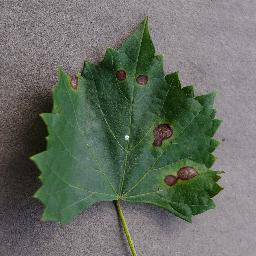

'black_rot'

In [11]:
random_id = rd.randint(0,169410)
ds['train'][random_id]
display(ds['train'][random_id]['image'])
labels[ds['train'][random_id]['label']]

In [12]:
def process_sample(sample):
    inputs = extractor(sample['image'].convert('RGB'), return_tensors="pt")
    inputs['label']=sample['label']
    return inputs

In [13]:
def transform(sample_batch):
    inputs = extractor([x.convert('RGB') for x in sample_batch['image']], return_tensors="pt")
    inputs['label'] = sample_batch['label']
    return inputs
ds=ds.with_transform(transform)
ds['train'][0:3]

{'pixel_values': tensor([[[[ 0.4431,  0.4902,  0.4745,  ...,  0.3490,  0.3098,  0.3255],
          [ 0.4196,  0.4667,  0.4824,  ...,  0.3333,  0.3098,  0.3412],
          [ 0.4039,  0.4275,  0.4745,  ...,  0.3255,  0.3098,  0.3333],
          ...,
          [ 0.0196,  0.0510,  0.0353,  ..., -0.0667,  0.0510,  0.1843],
          [ 0.0275,  0.0824,  0.0588,  ..., -0.1294, -0.0431,  0.0353],
          [ 0.0275,  0.0824,  0.0510,  ...,  0.0118,  0.0196,  0.0275]],

         [[ 0.4039,  0.4510,  0.4353,  ...,  0.3333,  0.2941,  0.3098],
          [ 0.3804,  0.4275,  0.4431,  ...,  0.3176,  0.2941,  0.3255],
          [ 0.3647,  0.3882,  0.4353,  ...,  0.3098,  0.2941,  0.3176],
          ...,
          [-0.0667, -0.0431, -0.0588,  ..., -0.1294, -0.0118,  0.1216],
          [-0.0667, -0.0196, -0.0431,  ..., -0.1922, -0.1059, -0.0275],
          [-0.0667, -0.0196, -0.0510,  ..., -0.0510, -0.0431, -0.0353]],

         [[ 0.4353,  0.4824,  0.4667,  ...,  0.4353,  0.3961,  0.4118],
          [ 0

In [14]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }


In [ ]:
import evaluate
# metric=evaluate.load('accuracy')
# def compute_metrics(p):
#     return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(p):
  accuracy_score = accuracy.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)
  f1_score = f1.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids, average="macro")
  return {**accuracy_score, **f1_score}

In [16]:
aimodel = ViTForImageClassification.from_pretrained(
    model_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
)

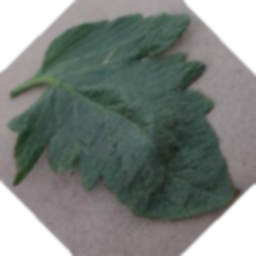

'bacterial_spot'

'bacterial_spot'

In [17]:
random_id = rd.randint(0,169410)
display(ods['train'][random_id]['image'])
display(labels[ods['train'][random_id]['label']])
out = aimodel(transform(ods['train'][random_id:random_id+1])['pixel_values']).logits
labels[out.argmax()]

In [ ]:
# training_args = TrainingArguments(
#   output_dir="./vit-aifarm2",
#   per_device_train_batch_size=256,
#   gradient_accumulation_steps=3,
#   gradient_checkpointing=True,
#   evaluation_strategy="steps",
#   save_strategy="steps",
#   num_train_epochs=3,
#   fp16=True,
#   save_steps=1000,
#   eval_steps=1000,
#   logging_steps=25,
#   logging_dir='./logs',
#   # learning_rate=2e-5,
#   learning_rate=5e-5,
#   save_total_limit=7,
#   remove_unused_columns=False,
#   push_to_hub=False,
#   report_to='tensorboard',
#   load_best_model_at_end=True
training_args = TrainingArguments(
  output_dir="./vit-aifarm3",
  per_device_train_batch_size=8,
  # gradient_accumulation_steps=2,
  # gradient_checkpointing=True,
  evaluation_strategy="steps",
  save_strategy="steps",
  num_train_epochs=1,
  fp16=True,
  save_steps=1000,
  eval_steps=1000,
  logging_steps=100,
  logging_dir='./logs',
  # learning_rate=2e-5,
  learning_rate=1e-5,
  save_total_limit=7,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    model=aimodel,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=ds['train'],
    eval_dataset=ds['test'],
    tokenizer=extractor,
)

In [ ]:
trainer.train()

In [ ]:
trainer.evaluate(ds['valid'])

In [ ]:
count = 0
mxighalat=True
immg=None
imml=None
immo=None
while mxighalat:
    random_id = rd.randint(0,166409)
    ds['train'][random_id]
    immg = (ods['train'][random_id]['image'])
    imml = (labels[ods['train'][random_id]['label']])
    timg = process_sample(ods['train'][random_id])
    timg['pixel_values']=timg['pixel_values'].to(device)
    out = aimodel(timg['pixel_values']).logits
    immo = labels[out.argmax()]
    if immo!=imml:
        break
    
display(immg)
display(imml)
display(immo)


In [ ]:
files = os.listdir('OData/custom/')
ig = Image.open('OData/custom/'+files[count]).resize((500,500))
display(ig)
tg = process_sample({'image':ig,'label':0})
tg['pixel_values']=tg['pixel_values'].to(device)
out = aimodel(tg['pixel_values']).logits
display(labels[out.argmax()])
count+=1
count=count%len(files)

In [ ]:
cds = ods['train']
cds = cds.train_test_split(train_size=0.11805748218807737487382606591149)['train']

In [ ]:
cds[0]

In [ ]:
ds_list=[]
for i in range(len(labels)):
    ds_list.append(cds.filter(lambda x: x['label']==i))

In [ ]:
import evaluate

metric=evaluate.load('accuracy')
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

def eval(ds):
    outs = aimodel((transform(ds))['pixel_values'].to(device))
    
    

In [ ]:
for idx, val in enumerate(ds_list):
    print ('#',idx,"/////////////////////////////////////////////")
    eval(val)